In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px   
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [4]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [5]:
train.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2.0


In [13]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

In [14]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


In [12]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [15]:
credit_0 = train[train['credit'] == 0]
credit_1 = train[train['credit'] == 1]
credit_2 = train[train['credit'] == 2]

In [34]:
fig = px.pie(credit_0, names='reality')
fig.show()

In [43]:
credit_0['reality'].value_counts()

1    2158
0    1064
Name: reality, dtype: int64

In [51]:
#test

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = [0,1]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values = credit_0['reality'].value_counts(), name="Credit_0"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values = credit_1['reality'].value_counts(), name="Credit_1"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values = credit_2['reality'].value_counts(), name="Credit_1"),
1, 3)

fig.update_layout(
    title_text="Real Estate Use by Credit Type")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 1)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

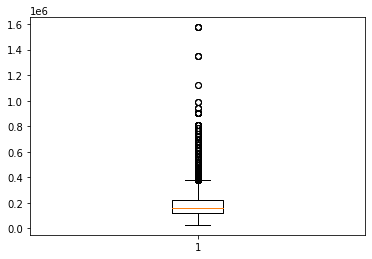

In [185]:
plt.boxplot(train['income_total'])

plt.show()

In [186]:
for dataset in train_and_test:
    num = dataset['income_total']
    Q1 = num.quantile(.25)
    Q2 = num.quantile(.5)
    Q3 = num.quantile(.75)
    IQR = Q3 - Q1

    print('Q1 : {q1} Q3 : {q3} IQR : {iqr}'.format(q1 = Q1, q3=Q3, iqr=IQR))

    dataset.loc[dataset['income_total'] > Q3 + 1.5*IQR, 'income_total'] = Q2

Q1 : 121500.0 Q3 : 225000.0 IQR : 103500.0
Q1 : 121500.0 Q3 : 225000.0 IQR : 103500.0


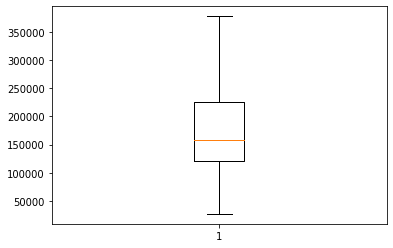

In [187]:
plt.boxplot(train['income_total'])

plt.show()


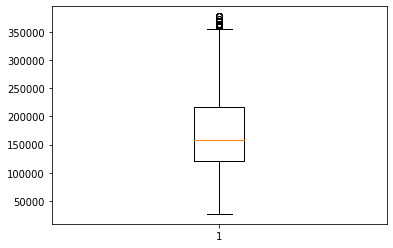

In [190]:
plt.boxplot(test['income_total'])

plt.show()

In [1]:
print('Hi')

Hi


In [124]:
train.loc[0]

gender                 F
reality                N
income_total    202500.0
occyp_type           NaN
credit               1.0
Name: 0, dtype: object

In [125]:
train['income_total']

0        202500.0
1        247500.0
2        157500.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

In [192]:
X_train = train[['gender', 'reality','income_total','occyp_type']]
y_train = train['credit']

X_test = test

In [193]:
X_train = pd.get_dummies(X_train, drop_first= True)
X_test = pd.get_dummies(X_test, drop_first= True)

In [198]:
X_train.shape

(26457, 20)

In [199]:
X_test.shape

(10000, 20)

In [202]:
clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [203]:
accuracy = round(cross_val_score(clf, X_train , y_train).mean()*100, 4)

In [204]:
accuracy

87.5987

In [210]:
predict_target = clf.predict(X_train)

In [211]:
len(predict_target)

26457

In [ ]:
cross_val_score()